# Histograma de imágenes

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [26]:
#Funcion para mostrar imagenes
def mostrar_imagen(titulo, imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(titulo)
  plt.grid(False)
  plt.show()

In [27]:
# Para establecer imagen
args = {"imagen": "caleido.jpg",
       "tamaño":650,
       "bins":3}

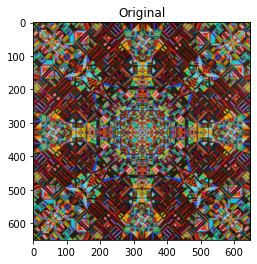

In [28]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

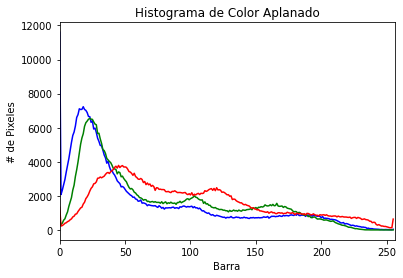

In [29]:
canales = cv2.split(imagen)
colores = ("b", "g", "r")

plt.figure()
plt.title("Histograma de Color Aplanado")
plt.xlabel("Barra")
plt.ylabel("# de Pixeles")

for (canal, color) in zip(canales, colores):
    # Crea un histograma para el canal actual y lo dibuja
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

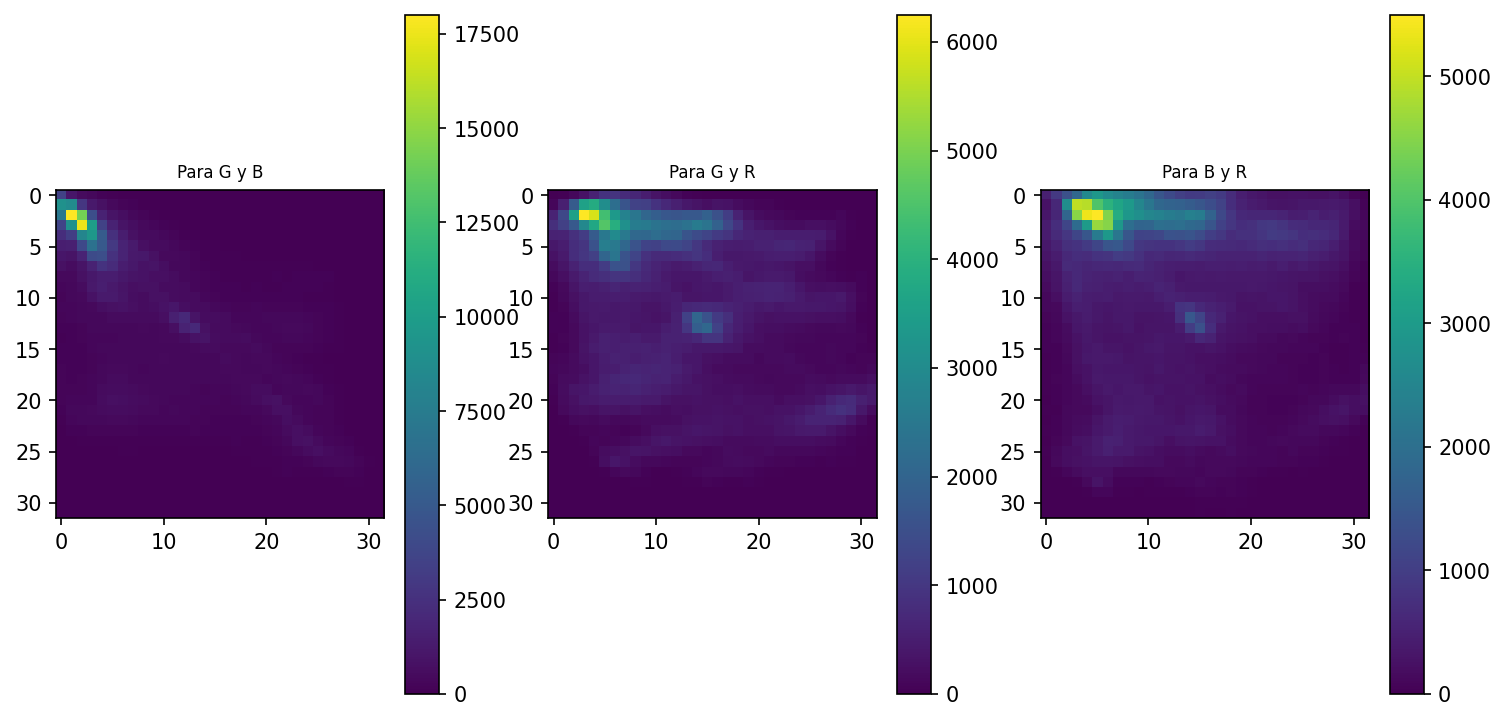

In [30]:
fig = plt.figure(figsize=(12, 6),dpi=150)

ax = fig.add_subplot(131)
hist = cv2.calcHist([canales[1], canales[0]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para G y B",fontsize=8)
plt.colorbar(p)

# Dibuja histograma de colores 2D para verde y rojo
ax = fig.add_subplot(132)
hist = cv2.calcHist([canales[1], canales[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para G y R",fontsize=8)
plt.colorbar(p)

# Dibuja histograma de colores 2D para azúl y rojo
ax = fig.add_subplot(133)
hist = cv2.calcHist([canales[0], canales[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para B y R",fontsize=8)
plt.colorbar(p)
plt.show()

In [31]:
tam = float(args["tamaño"])
bins = int(args["bins"])

Forma del histograma 3D: (3, 3, 3), con 27 valores


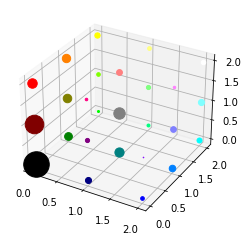

In [32]:

hist = cv2.calcHist([imagen], [0, 1, 2],
                    None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])


print("Forma del histograma 3D: %s, con %d valores" %
      (hist.shape, hist.flatten().shape[0]))


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


ratio = tam / np.max(hist)

# bucle sobre los planos del histograma
for (x, plane) in enumerate(hist):
    for (y, row) in enumerate(plane):
        for (z, col) in enumerate(row):
            # asegura que existe un valor en el bin
            if hist[x][y][z] > 0.0:
                # plot the bin
                siz = ratio * hist[x][y][z]
                rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
                ax.scatter(x, y, z, s = siz, facecolors = rgb)

plt.show()

In [33]:
imagen.shape

(650, 649, 3)

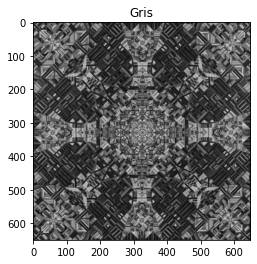

In [34]:
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
mostrar_imagen("Gris", gris)

In [35]:
hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])

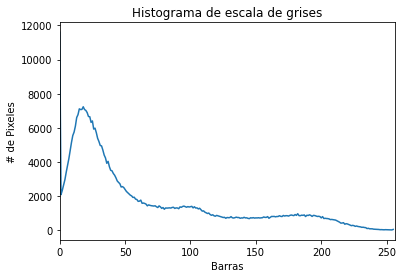

In [36]:
plt.figure()
plt.title("Histograma de escala de grises")
plt.xlabel("Barras")
plt.ylabel("# de Pixeles")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()